
# **Load Data — TravelTide**

In this notebook, we connect to the TravelTide PostgreSQL database and explore its datasets using the `Database` class, which securely executes SQL queries and returns results as Pandas DataFrames. The main tables include `users` (dimension table with demographic information) and `sessions`, `flights`, `hotels` (fact tables with transactional data). We also implement **Elena’s cohort logic**, filtering sessions after January 4, 2023, selecting active users with more than 7 sessions, and joining session records with user, flight, and hotel information. This creates an enriched session dataset with consistent date formatting and comprehensive session, booking, and user details. The resulting DataFrame can be used for exploratory data analysis, feature engineering, and downstream modeling. Using this approach ensures a clean, focused dataset for behavioral insights and travel analytics.




### **Environment Setup & Path Configuration**
* **Action:** The notebook begins by cleaning the system path (`sys.path`) to ensure no conflicting modules are loaded. It explicitly removes bad paths and adds the project root directory.
* **Purpose:** This ensures the custom `src` library can be imported correctly, which contains the essential `DataLoader`tools.


In [39]:
import sys, os  # noqa: E401
from IPython.display import display

bad_paths = [
    "/Users/guykaptue/my_work_spaces/machine learning",
    "/Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/src"
]
sys.path = [p for p in sys.path if os.path.abspath(p) not in bad_paths]

print("Clean sys.path:")
for p in sys.path:
    print(" -", p)

Clean sys.path:
 - /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project
 - /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project
 - /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project
 - /opt/anaconda3/envs/ml311/lib/python311.zip
 - /opt/anaconda3/envs/ml311/lib/python3.11
 - /opt/anaconda3/envs/ml311/lib/python3.11/lib-dynload
 - 
 - /opt/anaconda3/envs/ml311/lib/python3.11/site-packages
 - __editable__.tts_mastery_project-0.1.0.finder.__path_hook__


## **Notebook setup for TravelTide project**

In [40]:
# ============================================================
# Notebook setup for TravelTide project
# ============================================================

import os
import sys
import pandas as pd  # noqa: F401

# ------------------------------------------------------------
# 1️⃣ Determine project root dynamically
# - Works even if notebook is in a subfolder of notebooks/
# ------------------------------------------------------------
cwd = os.getcwd()
print("Current working directory:", cwd)

# Project root = traveltide_project folder
# Assumes notebooks/ is directly under traveltide_project/
project_root = os.path.abspath(os.path.join(cwd, "..", ".."))
print("Project root:", project_root)

## ------------------------------------------------------------
# 2️⃣ Add project root to sys.path for imports
# ------------------------------------------------------------
if project_root not in sys.path:
    sys.path.insert(0, project_root)

print("Project root added to sys.path:", project_root)


Current working directory: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/notebooks/preparing_data
Project root: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project
Project root added to sys.path: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project


# Verify Core Module Import


In [41]:
try:
    import src
    print("✅ src module found at:", src.__file__)
except ModuleNotFoundError as e:
    print("❌ src module not found:", e)


✅ src module found at: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/src/__init__.py


## Import DataLoader from Core

In [42]:
from src.core import DataLoader

In [43]:
loader = DataLoader()


✅ Verbindung zur PostgreSQL-Datenbank hergestellt.


## **1. Understanding the Data Structure**

In [44]:
users_df = loader.load_table(data_type='raw', table_name='users')
session_df = loader.load_table(data_type='raw', table_name='sessions')
flights_df = loader.load_table(data_type='raw', table_name='flights')
hotel_df = loader.load_table(data_type='raw', table_name='hotels')

📁 Lade Tabelle 'users' aus CSV: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/data/csv/raw/users.csv
✅ CSV geladen. Zeilen: 1020926
📁 Lade Tabelle 'sessions' aus CSV: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/data/csv/raw/sessions.csv
✅ CSV geladen. Zeilen: 5408063
📁 Lade Tabelle 'flights' aus CSV: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/data/csv/raw/flights.csv
✅ CSV geladen. Zeilen: 1901038
📁 Lade Tabelle 'hotels' aus CSV: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/data/csv/raw/hotels.csv
✅ CSV geladen. Zeilen: 1918617


### **TravelTide Data Model Description**

TravelTide records a total of **1,020,926 registered users** who were active in **5,408,063 sessions**. These sessions resulted in **1,901,038 flight bookings** and **1,918,617 hotel bookings**.

The **sessions table** is the central fact table of the data model. It documents all dynamic, transaction-related activities that occur during individual sessions. Additionally, the **users table**, as a dimension table, provides stable demographic information about the users, enabling contextual analysis of user behavior.

The **flights** and **hotels** tables are additional fact tables containing detailed information about the respective booking processes. They are directly linked to the sessions and allow for granular evaluation of travel preferences and booking patterns.

In [45]:
loader.show_nulls(users_df)

 Missing Values Summary:


,null_count,null_percent
user_id,0,0.0
birthdate,0,0.0
gender,0,0.0
married,0,0.0
has_children,0,0.0
home_country,0,0.0
home_city,0,0.0
home_airport,0,0.0
home_airport_lat,0,0.0
home_airport_lon,0,0.0


In [46]:
loader.show_nulls(hotel_df)

 Missing Values Summary:


,null_count,null_percent
trip_id,0,0.0
hotel_name,0,0.0
nights,0,0.0
rooms,0,0.0
check_in_time,0,0.0
check_out_time,0,0.0
hotel_per_room_usd,0,0.0


In [47]:
loader.show_nulls(flights_df)

 Missing Values Summary:


,null_count,null_percent
return_time,88734,4.67
trip_id,0,0.00
origin_airport,0,0.00
destination,0,0.00
destination_airport,0,0.00
seats,0,0.00
return_flight_booked,0,0.00
departure_time,0,0.00
checked_bags,0,0.00
trip_airline,0,0.00


In [48]:
loader.show_nulls(session_df)


 Missing Values Summary:


,null_count,null_percent
hotel_discount_amount,4716683,87.22
flight_discount_amount,4522267,83.62
trip_id,3072218,56.81
session_id,0,0.00
user_id,0,0.00
session_start,0,0.00
session_end,0,0.00
flight_discount,0,0.00
hotel_discount,0,0.00
flight_booked,0,0.00


During the initial data quality check, the **users data** was found to be complete and free of missing values—indicating a stable master data foundation. In contrast, the **sessions table** exhibits significant gaps: approximately **56.8%** of `trip_id` values and over **80%** of discount amounts (`flight_discount_amount`, `hotel_discount_amount`) are missing, suggesting incomplete booking information. The **flights** and **hotels data** are largely complete, except for **4.7%** of missing return flight data (`return_time`) in the flights, which may indicate one-way trips or gaps in return flight information.

## **SQL Query: Elena’s Cohort Definition for Enriched Sessions**


The **enriched sessions dataset (`sessions`)** includes the activities of **active users** who conducted **more than seven sessions** in 2023. Using an SQL query (`data/sql/elena_cohort.sql`), the original **5.4 million sessions** were filtered to focus on these relevant users and enriched with **flight and hotel bookings**, as well as **demographic information**. The result consists of **49,211 rows** and was successfully saved as `/data/csv/raw/elena_cohort.csv`.

This targeted filtering **significantly reduces the data volume**, making the dataset both **manageable for analysis** and **processable on my computer**. At the same time, it provides a **comprehensive representation of the user journey** for the most active travelers.

**Given the remaining data size**, subsequent analyses will focus exclusively on **active users as defined by Elena’s cohort** to ensure efficient and meaningful evaluation.

In [49]:
sessions = loader.load_table(data_type='raw', table_name='elena_cohort')

📁 Lade Tabelle 'elena_cohort' aus CSV: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/data/csv/raw/elena_cohort.csv
✅ CSV geladen. Zeilen: 49211


### **Overview of the Sessions Dataset Based on Elena’s Cohort Definition**

In [50]:
loader.show_dtypes(sessions)


🔤 Data Types:


,dtype
session_id,object
user_id,int64
trip_id,object
session_start,object
session_end,object
page_clicks,int64
flight_discount,bool
flight_discount_amount,float64
hotel_discount,bool
hotel_discount_amount,float64


In [51]:
# Displays null counts and percentages per column.
loader.show_nulls(sessions)

 Missing Values Summary:


,null_count,null_percent
hotel_discount_amount,43006,87.39
flight_discount_amount,40929,83.17
return_time,35559,72.26
destination_airport_lon,34941,71.00
destination_airport_lat,34941,71.00
destination,34941,71.00
destination_airport,34941,71.00
seats,34941,71.00
return_flight_booked,34941,71.00
departure_time,34941,71.00


**Missing Data in Elena’s TravelTide Cohort**

In Elena’s cohort of **49,211 active users**, user demographics and session activity are **100% complete**, painting a clear picture of who these travelers are. However, **over 70% of sessions lack critical booking details**—like destinations, flight times, and prices—revealing a stark gap between exploration and actual bookings. For example, **87% miss hotel discount data**, and **71% lack trip basics**, suggesting many users browsed but didn’t finalize plans.

This divide highlights **unfinished journeys**, not data errors. To analyze effectively, focus on the **29% with complete bookings** for reliable insights, or explore the **71% with gaps** to uncover barriers in the booking process. Segmenting users by booking status could reveal patterns—like why some complete trips while others abandon them. Ultimately, this data tells two stories: **one of certainty, the other of hesitation**.

In [52]:
# Displays number of unique values per column.
loader.show_unique_counts(sessions)

 Unique Value Counts:


,unique_count
session_id,49211
session_end,49128
session_start,42488
trip_id,16099
base_fare_usd,12604
check_in_time,12074
user_id,5998
birthdate,4807
return_time,2460
departure_time,2447


In [53]:
# Displays summary statistics for numerical columns.
loader.show_summary_stats(sessions)

 Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
user_id,49211.0,545282.69,64640.05,23557.00,517119.00,540308.00,573922.00,844489.00
page_clicks,49211.0,17.59,21.50,1.00,6.00,13.00,22.00,566.00
flight_discount_amount,8282.0,0.14,0.08,0.05,0.10,0.10,0.20,0.60
hotel_discount_amount,6205.0,0.11,0.06,0.05,0.05,0.10,0.15,0.45
home_airport_lat,49211.0,38.43,6.19,21.32,33.82,39.10,42.24,61.25
home_airport_lon,49211.0,-94.18,18.07,-157.93,-112.38,-90.04,-79.37,-63.50
seats,14270.0,1.22,0.59,1.00,1.00,1.00,1.00,8.00
checked_bags,14270.0,0.59,0.68,0.00,0.00,1.00,1.00,8.00
destination_airport_lat,14270.0,38.61,6.95,-37.01,33.94,39.87,42.41,55.97
destination_airport_lon,14270.0,-88.95,33.09,-157.93,-112.38,-87.75,-75.24,174.79


In [54]:
# Generates a summary table for outlier detection.
outlier_table = loader.generate_outlier_summary(sessions)

,Column,Min,25%,75%,Max,Outlier Notes
0,page_clicks,1.00,6.00,22.00,566.00,✅ Very high max — likely outliers above 100 cl...
1,flight_discount_amount,0.05,0.10,0.20,0.60,✅ Values > 0.35 may be outliers
2,hotel_discount_amount,0.05,0.05,0.15,0.45,✅ Values > 0.3 may be outliers
3,base_fare_usd,2.41,200.43,600.63,21548.04,🚨 Extreme outlier — fares above $1500 likely a...
4,checked_bags,0.00,0.00,1.00,8.00,✅ More than 3 bags is unusual
5,seats,1.00,1.00,1.00,8.00,✅ More than 3 seats per booking is rare
6,nights,-2.00,1.00,5.00,43.00,🚨 Negative nights = data error; >20 nights = o...
7,rooms,1.00,1.00,1.00,4.00,✅ More than 2 rooms may be outliers
8,hotel_price_per_room_night_usd,17.00,99.00,222.00,1376.00,✅ Prices > $500 are likely outliers


In [55]:
sessions[sessions['page_clicks'] > 300]

,session_id,user_id,trip_id,session_start,session_end,page_clicks,flight_discount,flight_discount_amount,hotel_discount,hotel_discount_amount,...,trip_airline,destination_airport_lat,destination_airport_lon,base_fare_usd,hotel_name,nights,rooms,check_in_time,check_out_time,hotel_price_per_room_night_usd
42353,590420-814ccf31a57445a889176d909b2c2057,590420,590420-d179fcd89e74481085069474c778696d,2023-05-24 18:56:00,2023-05-24 20:06:00.000000,566,False,NaN,False,NaN,...,United Airlines,32.699,-117.215,21.81,Marriott - san diego,0.0,1.0,2023-05-30 16:09:20.160,2023-05-31 11:00:00,209.0


In [56]:
sessions[sessions['base_fare_usd'] > 15000]

,session_id,user_id,trip_id,session_start,session_end,page_clicks,flight_discount,flight_discount_amount,hotel_discount,hotel_discount_amount,...,trip_airline,destination_airport_lat,destination_airport_lon,base_fare_usd,hotel_name,nights,rooms,check_in_time,check_out_time,hotel_price_per_room_night_usd
38935,421870-d1009efd95314eaf879350b2abca2d75,421870,421870-733eedd28dfa4828802248b60a5c11b6,2023-03-24 10:06:00,2023-03-24 10:07:15.000000,10,False,NaN,False,NaN,...,Malaysia Airlines,2.746,101.71,21548.04,NaN,NaN,NaN,NaN,NaN,NaN


## **The TravelTide Data Paradox: Gaps, Extremes, and Untold Stories**



Though Elena’s cohort consists of **highly active users**, the data reveals a surprising truth: **Over 71% of sessions lack flight details**, and **87% show no hotel discounts**—clear evidence that many users browse but never book. At the same time, **extreme outliers** stand out: a **$21,548.04 flight fare**, **566 page clicks in a single session**, and even **negative nights stayed**, pointing to **data errors and unusual behavior**.

These patterns—from missing `trip_id` values to illogical stay durations—highlight that even the most engaged users **don’t always convert**, and data quality demands scrutiny. In the next notebook, **`session_cleaner.ipynb`**, we’ll systematically **investigate, clean, and transform these anomalies into meaningful features**.

## **Visualization of User Activity, Booking Behavior, and Price Relationships in Elena’s Cohort**


📊 Generating EDA Visualizations for TravelTide Session Data


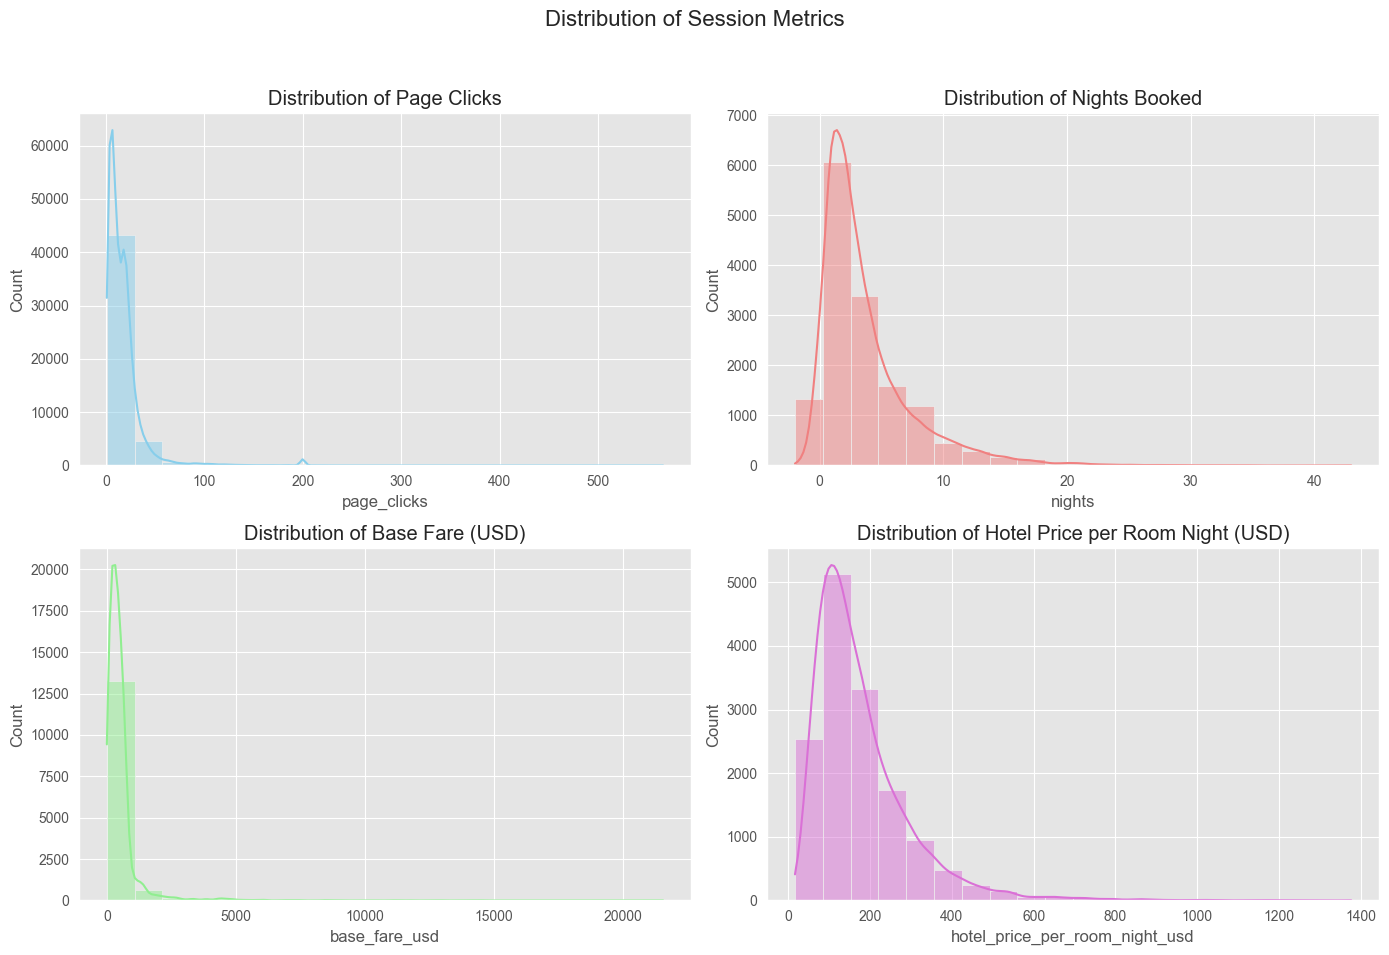

✅ Saved: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/reports/loader/session_distributions.png


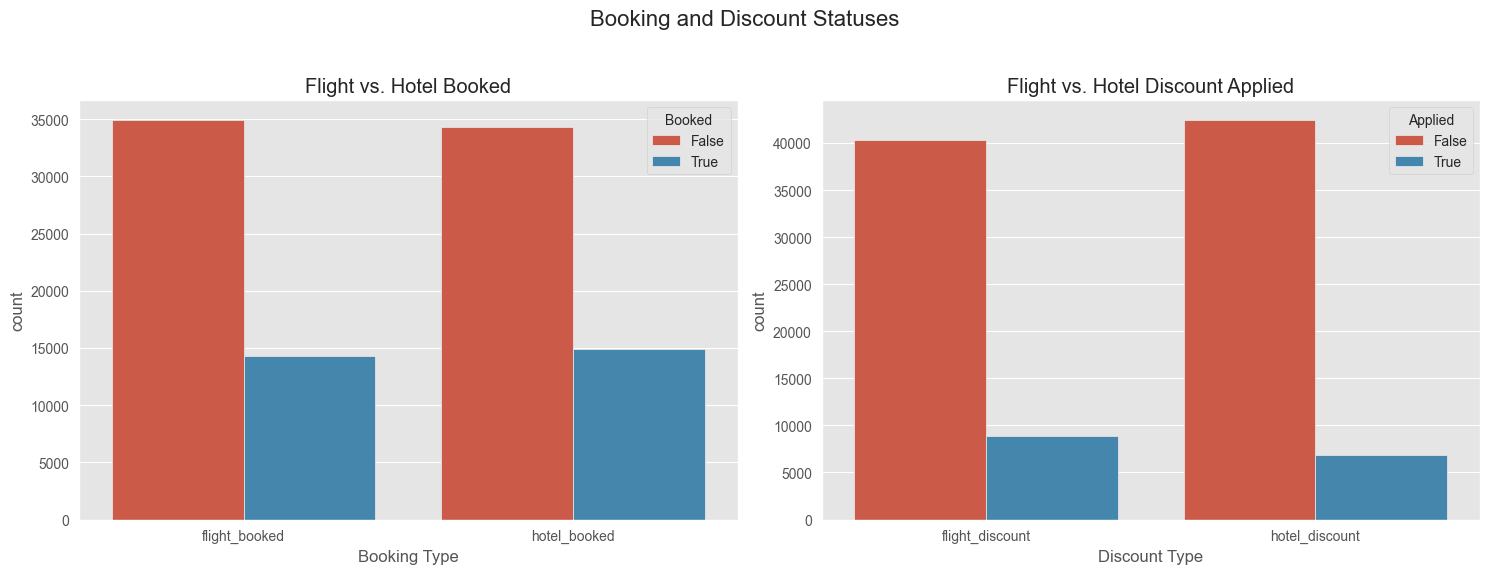

✅ Saved: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/reports/loader/booking_discounts.png


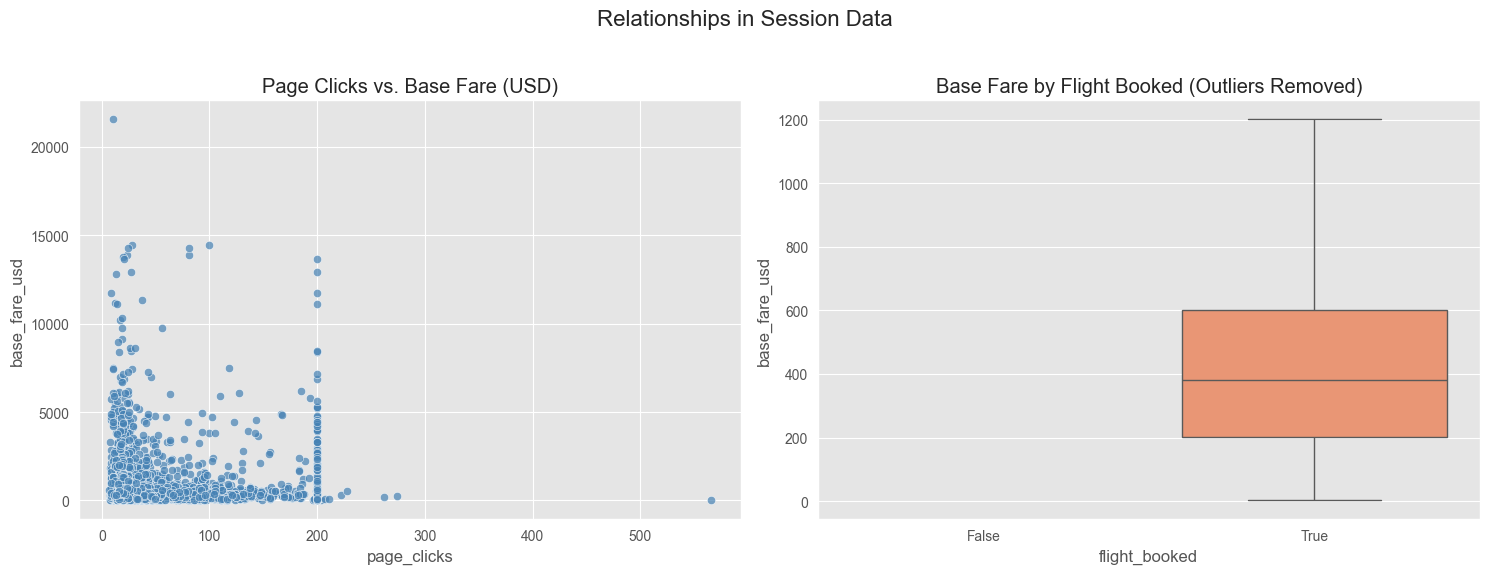

✅ Saved: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/reports/loader/relationships.png

🎉 All TravelTide EDA visualizations successfully generated and saved!


In [57]:
loader.generate_session_eda(sessions)

### **First Look: Elena’s Cohort – Raw Data Snapshot**

We loaded the **unfiltered `elena_cohort.csv` dataset** with **49,211 sessions**, giving us a clean baseline to review structure, completeness, and initial behavior patterns before any cleaning or filtering.

---

### **Image-Based Insights: Session Behavior at a Glance**

#### **Booking & Discount Behavior**

The dataset shows **high traffic but low conversion**:

* **Flights not booked**: 74%
* **Hotels not booked**: 76%
* **Flight discounts unused**: 86%
* **Hotel discounts unused**: 90%

**Insight:** Users browse heavily, but **few convert**, and **discounts are largely ignored**, signaling gaps in offer relevance or targeting.

#### **Clicks, Fares & Booking Patterns**

* **Page Clicks vs Base Fare**: Most users click **<30 times** and view fares **< $1,000**; only **~2%** exceed 100 clicks or engage with **$5,000+ fares**, pointing to niche premium or indecisive segments.
* **Base Fare by Booking Outcome**:

  * **Booked flights**: median **~$420**
  * **Not booked**: median **~$250**

**Implication:** Bookers tend to select **higher-value flights**, hinting at urgency or premium preference.

---

### **Key Distribution Signals**

* **Page Clicks**: Median **13**; only **~3%** exceed **50**.
* **Nights Booked**: Median **2**; **~6%** stay **>7 nights**.
* **Base Fare**: Median **~$382**; **~5%** exceed **$1,000**.
* **Hotel Price/Night**: Median **~$148**; premium (> $500) **~1%**.

---

### **Core Takeaways**

1. **Very low conversion** despite strong traffic; discount usage is minimal.
2. Engagement is mostly moderate, but a small **high-intent/high-value** segment exists.
3. Strong skew and extreme outliers (e.g., high fares, long stays) highlight the need for **cleaning** before segmentation.




### **Conclusion: From Raw Data to Strategic Insights**



The analysis of **Elena’s cohort dataset (49,211 sessions)** reveals a clear disparity: While **user demographic data is 100% complete**, over **70% of sessions lack booking details**—such as flight times or hotel prices—indicating **high user activity but low conversion rates** (only ~25% complete bookings). Extreme values like **$21,548 flights** or **566 clicks per session** further highlight **data quality issues** and unusual user behavior.

Despite these challenges, the dataset provides a **strong foundation** for deeper analysis. By combining **demographic data, session activity, and booking information**, we can identify **user segments** (e.g., browsers vs. bookers) and **optimize promotional strategies**. In the next step (`session_cleaner.ipynb`), we will **clean the data, engineer features, and correct outliers** to create a **model-ready, actionable dataset**. This process transforms raw data into **strategic insights** for TravelTide. 🚀